<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Randomise_Orbital_Simulations_and_TTVs_160924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytransit celerite emcee corner

  Using cached PyTransit-2.6.8-py3-none-any.whl.metadata (5.7 kB)
  Using cached celerite-0.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
  Using cached emcee-3.1.6-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached corner-2.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached uncertainties-3.2.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ldtk-1.8.4-py3-none-any.whl.metadata (992 bytes)
  Using cached pyopencl-2024.2.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.7 kB)
  Using cached pyrr-0.10.3-py3-none-any.whl.metadata (832 bytes)
  Using cached MeepMeep-0.6.3-py3-none-any.whl.metadata (714 bytes)
  Using cached pytools-2024.1.14-py3-none-any.whl.metadata (3.0 kB)
Using cached PyTransit-2.6.8-py3-none-any.whl (10.9 MB)
Using cached celerite-0.4.3-cp310-cp310-manylin

In [ ]:
from pytransit import QuadraticModel
# from pytransit import UniformModel
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

/usr/local/lib/python3.10/dist-packages/pytools/persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


#Orbital Simulations
######Randomising the angle at which the Moon is observed around the Earth - known as realisation

In [ ]:
def barycentre(Mp, Mm, dpm, moon_period):
  dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
  dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON
  print(f'Planet-barycentre distance = {dp:.3f}\nMoon-barycentre distance = {dm:.3f}')
  return(dp, dm)

In [ ]:
# PARAMETERS
Mp = 1*const.M_earth
Mm = 0.0123*const.M_earth
dpm = 0.3844e9*u.m
moon_period = 27.322*u.day
P = 1*u.year
P = P.to(u.day)

dp, dm = barycentre(Mp, Mm, dpm, moon_period)

Planet-barycentre distance = 4670670.750 m
Moon-barycentre distance = 379729329.250 m


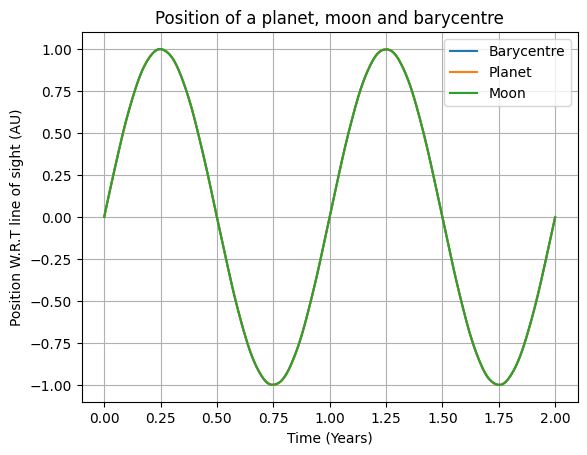


Starting angle of planet and moon = (<Quantity 207.9016098 deg>, <Quantity 387.9016098 deg>)
Angle difference = -180 deg


In [ ]:
# HOW MANY TRANSITS YOU WANT TO OBSERVE
t = np.linspace(0, 2*P, 1000)

# BARYCENTRE
ab = 1*const.au # SEPARATION
Pb = P.to(u.s)  # PERIOD
wb = (2*np.pi/Pb) *u.rad # ANGULAR FREQ
alphab = wb*t
xb = ab*np.sin(alphab)

angle = np.random.uniform(0, 2*np.pi)*u.rad

# PLANET
wp = 2*np.pi/moon_period *u.rad
alphap = wp*t + angle
xp = dp * np.sin(alphap) + xb

# MOON
wm = 2*np.pi/moon_period *u.rad
alpham = wm*t + np.pi*u.rad + angle
xm = dm*np.sin(alpham) + xb

plt.plot(t/P, xb/ab.to(u.m), label = 'Barycentre')
plt.plot(t/P, xp/ab.to(u.m), label = 'Planet')
plt.plot(t/P, xm/ab.to(u.m), label = 'Moon')

plt.title('Position of a planet, moon and barycentre')
plt.xlabel('Time (Years)')
plt.ylabel('Position W.R.T line of sight (AU)')
plt.grid(True)
plt.legend()

#plt.xlim(-0.1, 2.1)
plt.show()

# TEST TO SEE IF THE ANGLES ARE RANDOMISED
i = 0 # RANDOM VALUE TO TEST
alphap[i], alpham[i]
a = alphap[i]-alpham[i]
print(f'\nStarting angle of planet and moon = {alphap[i].to(u.deg), alpham[i].to(u.deg)}\nAngle difference = {a.to(u.deg):.0f}')

#TTV calculations
######Using the previous values of angles to calculate the TTVs for moon and planet

Velocity of system around star = 29785.254 m / s


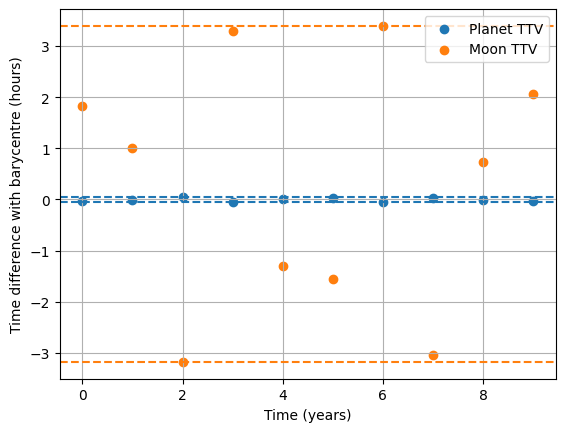

Planet TTV = -80.869 s
Moon TTV = 6573.052 s


In [ ]:
N = 10 # NUMBER OF TRANSITS
t = np.arange(0,N*P.value,P.value)*P.unit # TIME

#######################
alphab = wb*t
xb = ab*np.sin(alphab)

# PLANET
wp = 2*np.pi/moon_period *u.rad
alphap = wp*t + angle # USING THE ANGLE FROM THE PREVIOUS CELL
xp = dp * np.sin(alphap) + xb
# MOON
wm = 2*np.pi/moon_period *u.rad
alpham = wm*t + np.pi*u.rad + angle
xm = dm*np.sin(alpham) + xb
#######################

diffp = xb - xp
diffm = xb - xm

vb = (2*np.pi*ab)/P.to(u.s) # BARYCENTRE VELOCITY
print(f'Velocity of system around star = {vb:.3f}')

ttvp = diffp/vb
ttvm = diffm/vb

maxp = np.max(ttvp).to(u.h)
minp = np.min(ttvp).to(u.h)

maxm = np.max(ttvm).to(u.h)
minm = np.min(ttvm).to(u.h)


plt.scatter(t/P, ttvp.to(u.h), label = 'Planet TTV')
plt.scatter(t/P, ttvm.to(u.h), label = 'Moon TTV')

plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

plt.xlabel('Time (years)')
plt.ylabel('Time difference with barycentre (hours)')
plt.grid()
plt.legend()
plt.show()
print(f'Planet TTV = {ttvp[0]:.3f}\nMoon TTV = {ttvm[0]:.3f}')